In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [2]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns 

    def fit(self,X,y=None):
        return self

    def transform(self,X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [3]:
def processor(data):
    data = MultiColumnLabelEncoder(columns=['attendant_machine_id', 'service_room_id', 'pause_time', 'customer_time_talks',
                                            'duration_categories', 'relocate', 'disconnected_by_attendant', 'ticket_priority',
                                            'pause_time_category', 'number_of_breaks', 'ticket_category', 'region', 'call_period',
                                            'call_surplus']).fit_transform(data)

    bool_map = {True: 1, False: 0}

    data = data.applymap(lambda x: bool_map.get(x, x))

    return data

### Problema: Detecção de fraudes

In [4]:
file_treino = 'chamados-totais-treino.csv'
file_teste = 'chamados-totais-teste.csv'

chamados_treino = pd.read_csv(file_treino)
chamados_teste = pd.read_csv(file_teste)

chamados_treino.head()

,wait_time,standby_time,calling_time,attendant_machine_id,service_room_id,pause_time,relocate,disconnected_by_attendant,ticket_priority,number_of_breaks,...,call_surplus,attendant_level,duration_categories,short_call,call_period,customer_time_talks,pause_time_category,region,out_average,resolved_tickets
0,5,0,1,1,7,0,1,1,4,1,...,2,1,de 1 a 5 min,0,noite,até 1 min,média,Sul,0,True
1,5,0,1,1,7,0,1,1,4,1,...,2,1,de 10 a 30 min,0,noite,até 1 min,longa,Sul,1,True
2,3,0,1,2326,7,0,0,0,5,0,...,2,1,até 1 min,1,manhã,até 1 min,rapida,Sul,0,True
3,3,0,1,2326,7,0,0,0,5,0,...,2,1,de 1 a 5 min,0,manhã,de 1 a 5 min,rapida,Sul,0,True
4,3,0,1,2326,7,0,1,1,5,1,...,2,1,de 1 a 5 min,0,manhã,de 1 a 5 min,rapida,Sul,0,True


#### Observando quantidade de dados em cada dataset

In [5]:
#instancias
print(f'chamado de treino {chamados_treino.shape[0]} instancias')
print(f'chamado de teste {chamados_teste.shape[0]} instancias')

chamado de treino 131174 instancias
chamado de teste 10000 instancias


In [6]:
#atributos
if list(chamados_treino.columns) == list(chamados_teste.columns):
    print('Todos atributos são iguais')
else:
    print('Os atributos NÃO são iguais')

Todos atributos são iguais


#### Quantos valores nulos (NAN) existem nos datasets?


In [7]:
#verifica se tem valores nulos no dataset de treino e de teste
qtd_null = [chamados_treino.isnull().sum().value_counts(), chamados_teste.isnull().sum().value_counts()]

for i in range(0,len(qtd_null)):
    if i == 0:
        dataset_name = 'treino'
    else:  
        dataset_name = 'teste'
        
    if (len(qtd_null[i]) == 1) and (qtd_null[i].index[0] == 0):
        print(f'Não tem nulos no dataset {dataset_name}')
    else:
        print(f'Tem valores nulos no dataset {dataset_name}')

Não tem nulos no dataset treino
Não tem nulos no dataset teste


#### Quantas rechamadas e não chamadas unicas temos na nossa base de treino e teste?

In [8]:
print('Treino')
print('Quantidade de chamados unicos: ', chamados_treino['resolved_tickets'].value_counts().values[0])
print('Quantidade de chamados reabertos: ', chamados_treino['resolved_tickets'].value_counts().values[1])
print('\n')

print('Teste')
print('Quantidade de chamados unicos: ', chamados_teste['resolved_tickets'].value_counts().values[0])
print('Quantidade de chamados reabertos: ', chamados_teste['resolved_tickets'].value_counts().values[1])

Treino
Quantidade de chamados unicos:  65587
Quantidade de chamados reabertos:  65587


Teste
Quantidade de chamados unicos:  5000
Quantidade de chamados reabertos:  5000


#### Separando as features (características) da variável resposta(rótulo/classe)

In [9]:
# Transformando nominais em categorias numéricas para rodar no fit do randon forest
chamados_treino_encoded = processor(chamados_treino)
chamados_teste_encoded = processor(chamados_teste)

print('Treino')
display(chamados_treino_encoded.head())

print('\n Teste')
display(chamados_teste_encoded.head())

Treino


,wait_time,standby_time,calling_time,attendant_machine_id,service_room_id,pause_time,relocate,disconnected_by_attendant,ticket_priority,number_of_breaks,...,call_surplus,attendant_level,duration_categories,short_call,call_period,customer_time_talks,pause_time_category,region,out_average,resolved_tickets
0,5,0,1,0,2,0,1,1,0,1,...,1,1,1,0,1,0,1,4,0,1
1,5,0,1,0,2,0,1,1,0,1,...,1,1,2,0,1,0,0,4,1,1
2,3,0,1,19,2,0,0,0,1,0,...,1,1,0,1,0,0,2,4,0,1
3,3,0,1,19,2,0,0,0,1,0,...,1,1,1,0,0,1,2,4,0,1
4,3,0,1,19,2,0,1,1,1,1,...,1,1,1,0,0,1,2,4,0,1



 Teste


,wait_time,standby_time,calling_time,attendant_machine_id,service_room_id,pause_time,relocate,disconnected_by_attendant,ticket_priority,number_of_breaks,...,call_surplus,attendant_level,duration_categories,short_call,call_period,customer_time_talks,pause_time_category,region,out_average,resolved_tickets
0,2,0,0,6,1,0,1,1,0,1,...,1,9,1,0,1,1,2,3,0,1
1,2,0,0,6,1,0,0,0,0,0,...,1,9,0,1,0,0,2,3,0,1
2,2,0,0,6,1,0,0,0,0,0,...,1,9,0,1,0,0,2,3,0,1
3,2,0,0,6,1,0,1,1,0,1,...,1,1,1,0,0,1,2,3,0,1
4,2,0,0,6,1,0,1,1,0,1,...,1,1,3,0,2,3,2,3,0,1


In [10]:
#iloc é usado quando queremos selecionar dados de linhas e colunas pelo seu valor numérico de índice.
# pega todas as linhas e todas as colunas - exceto a última coluna
#posições do final começam com -1

# X = chamados_treino_encoded.iloc[:, :-1] 
# y = chamados_treino_encoded['resolved_tickets']

#### Separando dados para treino e dados para teste

In [11]:
X_train = chamados_treino_encoded
X_test = chamados_teste_encoded

y_train = X_train.pop('resolved_tickets')
y_test = X_test.pop('resolved_tickets')

#30% dos dados estão sendo separados para teste
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [12]:
X_train.shape, X_test.shape

((131174, 21), (10000, 21))

In [13]:
y_train.shape, y_test.shape

((131174,), (10000,))

In [14]:
X_test.head()

,wait_time,standby_time,calling_time,attendant_machine_id,service_room_id,pause_time,relocate,disconnected_by_attendant,ticket_priority,number_of_breaks,...,attendant_id,call_surplus,attendant_level,duration_categories,short_call,call_period,customer_time_talks,pause_time_category,region,out_average
0,2,0,0,6,1,0,1,1,0,1,...,4651225,1,9,1,0,1,1,2,3,0
1,2,0,0,6,1,0,0,0,0,0,...,4608089,1,9,0,1,0,0,2,3,0
2,2,0,0,6,1,0,0,0,0,0,...,4652723,1,9,0,1,0,0,2,3,0
3,2,0,0,6,1,0,1,1,0,1,...,4650776,1,1,1,0,0,1,2,3,0
4,2,0,0,6,1,0,1,1,0,1,...,4690542,1,1,3,0,2,3,2,3,0


#### Treinando o modelo - da base que foi separada para treino

In [15]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

#### Testando o modelo - da base que foi separada para teste

In [16]:
y_pred_treined = model.predict(X_test)

#### Resultados da classificação da base de teste:

In [17]:
y_pred_treined

array([0, 1, 1, ..., 0, 1, 0])

#### juntando os dados

In [18]:
#Criando um dataset que irá conter os dados da base de teste a também a classificação dada pelo modelo
X_test_com_classificação = X_test 

In [19]:
#acrescentando a coluna que irá conter as classificações dadas pelo modelo
X_test_com_classificação['classificação'] = y_pred_treined 

In [20]:
X_test_com_classificação.head()

,wait_time,standby_time,calling_time,attendant_machine_id,service_room_id,pause_time,relocate,disconnected_by_attendant,ticket_priority,number_of_breaks,...,call_surplus,attendant_level,duration_categories,short_call,call_period,customer_time_talks,pause_time_category,region,out_average,classificação
0,2,0,0,6,1,0,1,1,0,1,...,1,9,1,0,1,1,2,3,0,0
1,2,0,0,6,1,0,0,0,0,0,...,1,9,0,1,0,0,2,3,0,1
2,2,0,0,6,1,0,0,0,0,0,...,1,9,0,1,0,0,2,3,0,1
3,2,0,0,6,1,0,1,1,0,1,...,1,1,1,0,0,1,2,3,0,0
4,2,0,0,6,1,0,1,1,0,1,...,1,1,3,0,2,3,2,3,0,0


### Acurácia do modelo

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_treined)

0.761

### Curva Roc Auc

In [22]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_treined)

0.761

### Matriz de Confusão

In [23]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred_treined,normalize='true', labels=[True, False])

matriz_confusao = pd.DataFrame({'True-Predito': matriz[:, 0], 'False-Predito': matriz[:, 1]}, index=['True-Real', 'False-Real'])
matriz_confusao

,True-Predito,False-Predito
True-Real,0.6326,0.3674
False-Real,0.1106,0.8894


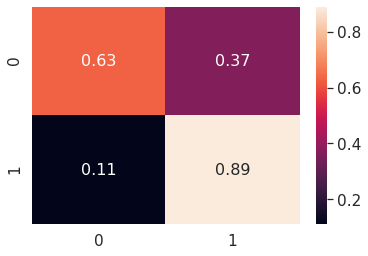

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

df_cm = pd.DataFrame(matriz, range(2), range(2))

sns.set(font_scale=1.4) 
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) 
plt.show()